In [33]:
import numpy as np
import pandas as pd

In [34]:
k = 3
threshhold = 2
iteration = 500
data = pd.read_excel('data/consumption_data.xls', index_col='Id')
# 数据标准化
data_zs = 1.0 * (data - data.mean())/data.std()

In [35]:
from sklearn.cluster import KMeans

In [36]:
model = KMeans(n_clusters=k, max_iter=iteration, n_jobs=4)
model.fit(data_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
r = pd.concat([data_zs, pd.Series(model.labels_, index=data.index)], axis=1)

In [38]:
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头

In [39]:
norm = []
for i in range(k):
    norm_tmp = r[['R', 'F', 'M']][r[u'聚类类别'] == i] - model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm, axis = 1)
    norm.append(norm_tmp/ norm_tmp.median())
norm = pd.concat(norm)

In [40]:
import matplotlib.pyplot as plt

In [41]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
norm[norm <= threshhold].plot(style = 'go')

In [42]:
discrete_points = norm[norm > threshhold]
discrete_points.plot(style = 'ro')

/Users/heron/Applications/Anacoda/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


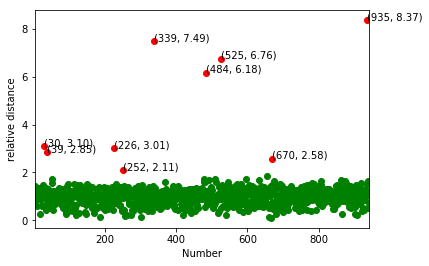

In [43]:
for i in range(len(discrete_points)):
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)'%(id, n), xy = (id, n), xytext = (id, n))
plt.xlabel(u'Number')
plt.ylabel(u'relative distance')
plt.show()

In [47]:
r[['R', 'M', 'F']]

,R,M,F
Id,,,
1,0.764186,-1.158711,-0.493579
2,-1.024757,0.622527,-0.630079
3,-0.950217,-0.341103,0.871423
4,-1.024757,-1.158432,0.188922
5,-0.204824,1.189868,-0.357079
6,0.167872,-1.176237,-0.493579
7,-0.875678,-0.623124,-1.039580
8,0.689647,-0.002828,-1.039580
9,0.316951,-1.057791,-0.084078
